<a href="https://colab.research.google.com/github/LingliHelen/Study-on-FAANG-Market/blob/main/Market%20Impact%20on%20FAANG%20Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Impact on FAANG Market

[*********************100%***********************]  3 of 3 completed


Ticker            AAPL        META        MSFT
Date                                          
2022-08-01  158.959778  159.057404  271.132477
2022-08-02  157.483444  159.315979  268.021271
2022-08-03  163.506836  167.878998  275.482147
2022-08-04  163.191864  169.639343  276.632904
2022-08-05  162.965195  166.198212  275.911255


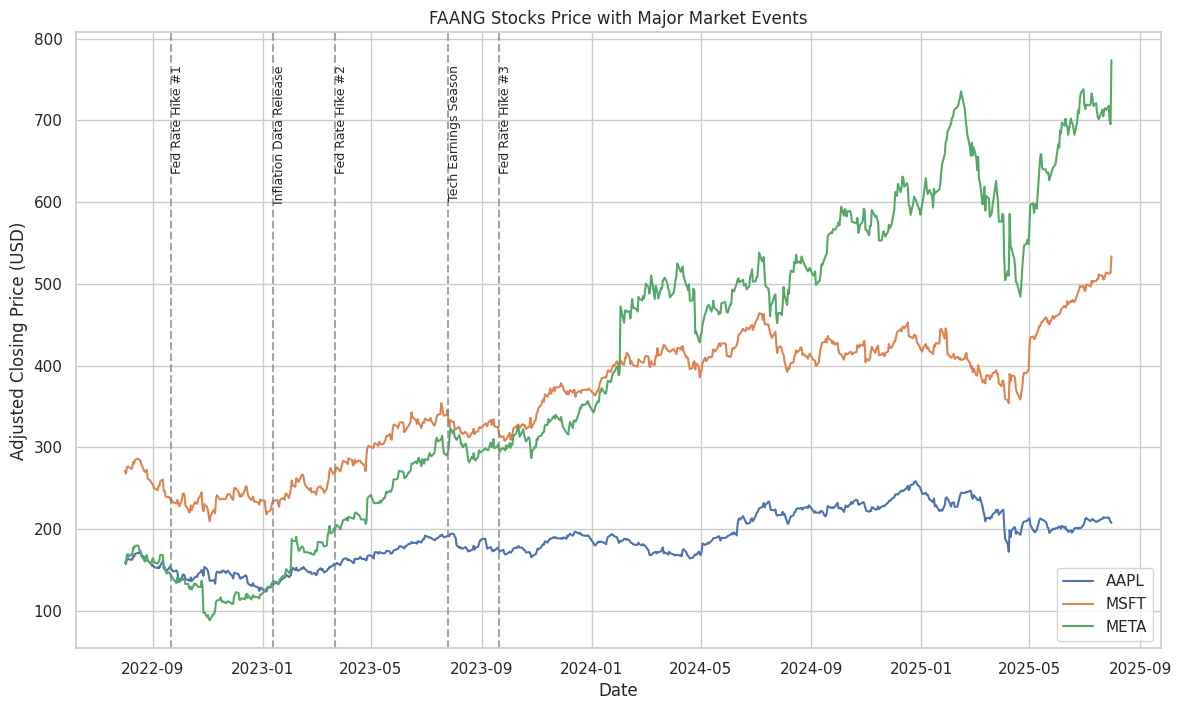

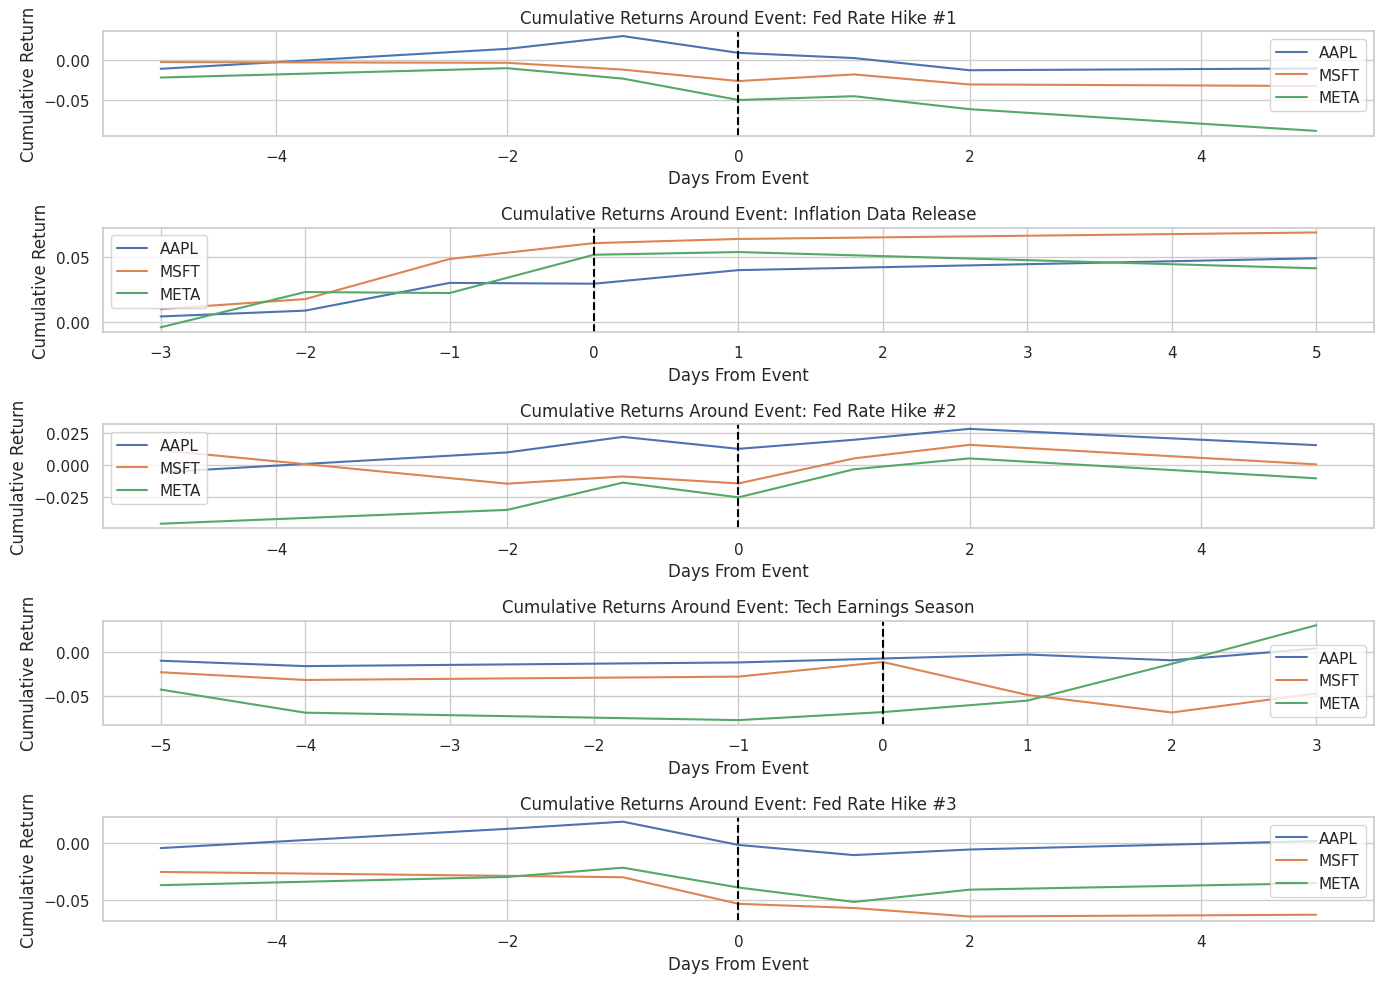

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Define date range
start_date = "2022-08-01"
end_date = "2025-08-01"

# Define tickers
tickers = ["AAPL", "MSFT", "META"]

# Download adjusted closing prices
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]

# Check data
print(data.head())

# Calculate daily returns
returns = data.pct_change().dropna()

# Define major market events (dates as strings)
events = {
    "Fed Rate Hike #1": "2022-09-21",
    "Inflation Data Release": "2023-01-12",
    "Fed Rate Hike #2": "2023-03-22",
    "Tech Earnings Season": "2023-07-25",
    "Fed Rate Hike #3": "2023-09-20"
}

# Convert event dates to pandas datetime
event_dates = pd.to_datetime(list(events.values()))

# Plot adjusted close prices with event annotations
plt.figure(figsize=(14,8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

for event, date in events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(event_date, color='grey', linestyle='--', alpha=0.7)
    plt.text(event_date, plt.ylim()[1]*0.95, event, rotation=90, verticalalignment='top', fontsize=9)

plt.title("FAANG Stocks Price with Major Market Events")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Event window analysis: Calculate cumulative returns +/- 5 trading days around events
window = 5  # days before and after event
cumulative_returns_event = {}

for event, date_str in events.items():
    date = pd.to_datetime(date_str)

    # Select trading days only within window using the returns DataFrame's index (which has trading days)
    event_window_data = returns.loc[date - pd.Timedelta(days=15) : date + pd.Timedelta(days=15)]

    # Filter to +/- 5 trading days around event (based on trading days, not calendar days)
    event_window_data = event_window_data.reset_index()
    event_window_data["Days From Event"] = (event_window_data["Date"] - date).dt.days
    event_window_data = event_window_data[(event_window_data["Days From Event"] >= -window) & (event_window_data["Days From Event"] <= window)]
    event_window_data = event_window_data.set_index("Days From Event")

    # Calculate cumulative returns in the window
    cumulative_returns = (1 + event_window_data[tickers]).cumprod() - 1
    cumulative_returns_event[event] = cumulative_returns

# Plot cumulative returns around events
plt.figure(figsize=(14,10))
for i, (event, cum_returns) in enumerate(cumulative_returns_event.items(), 1):
    plt.subplot(len(events), 1, i)
    for ticker in tickers:
        plt.plot(cum_returns.index, cum_returns[ticker], label=ticker)
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f"Cumulative Returns Around Event: {event}")
    plt.xlabel("Days From Event")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()